### PoC Proof of Concept - Auslesen Daten Sensoneo Füllstandsensoren
Für PoC wurden die Daten von der Sigfox Plattform in csv-From heruntergeladen. Hier werden die Daten des Füllstandsensors der bei Kompotoi montiert ist ausgelesen 

In [1]:
# import librarys
import pandas as pd
import glob
import os
import numpy as np
import re
import matplotlib.pyplot as plt 
import matplotlib as mpl
#print(plt.style.available)
# optional: for ggplot-like style
mpl.style.use(['ggplot']) 
# damit plt.show() nicht benötigt wird
%matplotlib inline

#### Alle 'page' files im Order einlesen

In [2]:
path_data = r'./data/sensoneo'
# advisable to use os.path.join as this makes concatenation OS independent
all_files = glob.glob(os.path.join(path_data + '/*.csv'))
len(all_files), all_files[0]

(3, './data/sensoneo\\export-device-34EF62-messages_p1.csv')

In [3]:
# lese alle files im Ordner (Achtung: csv file Daten von Plattform mit ; getrennt)
df_sensoneo = pd.concat((pd.read_csv(f, sep=';') for f in all_files), ignore_index=True)
df_sensoneo.head(3)

,Country,Data,Device ID,Timestamp
0,NaN,b92a0070010c0c0c0c6e0c3f,0034EF62,2021-05-04 07:05:30
1,NaN,b92a0070010c0c0c0c6e0a3e,0034EF62,2021-05-04 05:05:31
2,NaN,b92a0070010b0b0b0b6e0a3d,0034EF62,2021-05-04 03:05:27


#### DF fast clean up

In [4]:
# set Timestamp as index
df_sensoneo.index = pd.to_datetime(df_sensoneo['Timestamp'])
# drop na columne country
df_sensoneo.drop('Timestamp', axis=1, inplace=True)
df_sensoneo.drop('Country', axis=1, inplace=True)
df_sensoneo

,Data,Device ID
Timestamp,,
2021-05-04 07:05:30,b92a0070010c0c0c0c6e0c3f,0034EF62
2021-05-04 05:05:31,b92a0070010c0c0c0c6e0a3e,0034EF62
2021-05-04 03:05:27,b92a0070010b0b0b0b6e0a3d,0034EF62
2021-05-04 01:05:25,b92a0070010b0b0b0b6e0c3c,0034EF62
2021-05-03 23:05:24,b92a0070010b0b0b0b6f0e3b,0034EF62
...,...,...
2021-04-13 17:06:56,b92a0070013d3d3d3d6e0b3e,0034EF62
2021-04-13 15:06:55,b92a0070013c3c3c3c6e0c3d,0034EF62
2021-04-13 13:07:15,b92a0070010c0c0c0c6e0c3c,0034EF62


In [5]:
#df_sensoneo.loc['2021-4-23']

### System Daten Decodieren

In [6]:
test_string = df_sensoneo['Data'][0]
print(test_string)

b92a0070010c0c0c0c6e0c3f


#### Regex Versuche

In [7]:
# Hex daten aufsplitten
# full_pattern = r'b92a00700\w\w\w\w\w\w\w\w\w\w\w\w\w\w\w'
pat_distance01 = r'b92a00700\w(\w\w)\w\w\w\w\w\w\w\w\w\w\w\w'
pat_distance02 = r'b92a00700\w\w\w(\w\w)\w\w\w\w\w\w\w\w\w\w'
pat_distance03 = r'b92a00700\w\w\w\w\w(\w\w)\w\w\w\w\w\w\w\w'
pat_distance04 = r'b92a00700\w\w\w\w\w\w\w(\w\w)\w\w\w\w\w\w'
pat_voltage    = r'b92a00700\w\w\w\w\w\w\w\w\w(\w\w)\w\w\w\w'
pat_temperatur = r'b92a00700\w\w\w\w\w\w\w\w\w\w\w(\w\w)\w\w'
pat_event_count = r'b92a00700\w{13}(\w\w)'

# Hex-code
hex_distance01 = str(re.findall(pat_distance01, test_string)[0])
hex_distance02 = str(re.findall(pat_distance02, test_string)[0])
hex_distance03 = str(re.findall(pat_distance03, test_string)[0])
hex_distance04 = str(re.findall(pat_distance04, test_string)[0])
hex_voltage    = str(re.findall(pat_voltage, test_string)[0])
hex_temperatur = str(re.findall(pat_temperatur, test_string)[0])
hex_event_count = str(re.findall(pat_event_count, test_string)[0])

# Umrechnungen
distance_cm_01  = int(hex_distance01, 16)*2
distance_cm_02  = int(hex_distance02, 16)*2
distance_cm_03  = int(hex_distance03, 16)*2
distance_cm_04  = int(hex_distance04, 16)*2
voltage_mV  = (int(hex_voltage, 16)*10) + 2500
temperatur  = int(hex_temperatur, 16)
event_count = int(hex_event_count, 16)

print('Distanz [cm] 01: ', distance_cm_01, '\t','Distanz 01(hex): ', '\t', hex_distance01)
print('Distanz [cm] 02: ', distance_cm_02, '\t','Distanz 02(hex): ', '\t', hex_distance02)
print('Distanz [cm] 03: ', distance_cm_03, '\t','Distanz 03(hex): ', '\t', hex_distance03)
print('Distanz [cm] 04: ', distance_cm_04, '\t','Distanz 04(hex): ', '\t', hex_distance04)
print('Spannung [mV]: ', voltage_mV, '\t','Spannung(hex): ', '\t', hex_voltage)
print('Temperatur: ', temperatur, '\t','Temperatur(hex): ', '\t', hex_temperatur)
print('Event Counter: ', event_count, '\t','Event Counter(hex): ', '\t', hex_event_count)

measurements = {'distance':[distance_cm_01,distance_cm_02,distance_cm_03,distance_cm_04], 
                       'Voltage_mV':voltage_mV, 'Temperatur':temperatur, 'Event Count':event_count}
measurements

Distanz [cm] 01:  24 	 Distanz 01(hex):  	 0c
Distanz [cm] 02:  24 	 Distanz 02(hex):  	 0c
Distanz [cm] 03:  24 	 Distanz 03(hex):  	 0c
Distanz [cm] 04:  24 	 Distanz 04(hex):  	 0c
Spannung [mV]:  3600 	 Spannung(hex):  	 6e
Temperatur:  12 	 Temperatur(hex):  	 0c
Event Counter:  63 	 Event Counter(hex):  	 3f


{'distance': [24, 24, 24, 24],
 'Voltage_mV': 3600,
 'Temperatur': 12,
 'Event Count': 63}

In [8]:
# Als Funktion
def data_decoder(data, print_for_debug = False):
    # Hex daten aufsplitten
    # full_pattern = r'b92a00700\w\w\w\w\w\w\w\w\w\w\w\w\w\w\w'
    pat_distance01 = r'b92a00700\w(\w\w)\w\w\w\w\w\w\w\w\w\w\w\w'
    pat_distance02 = r'b92a00700\w\w\w(\w\w)\w\w\w\w\w\w\w\w\w\w'
    pat_distance03 = r'b92a00700\w\w\w\w\w(\w\w)\w\w\w\w\w\w\w\w'
    pat_distance04 = r'b92a00700\w\w\w\w\w\w\w(\w\w)\w\w\w\w\w\w'
    pat_voltage    = r'b92a00700\w\w\w\w\w\w\w\w\w(\w\w)\w\w\w\w'
    pat_temperatur = r'b92a00700\w\w\w\w\w\w\w\w\w\w\w(\w\w)\w\w'
    pat_event_count = r'b92a00700\w{13}(\w\w)'
    
    # Hex-code
    hex_distance01 = str(re.findall(pat_distance01, data)[0])
    hex_distance02 = str(re.findall(pat_distance02, data)[0])
    hex_distance03 = str(re.findall(pat_distance03, data)[0])
    hex_distance04 = str(re.findall(pat_distance04, data)[0])
    hex_voltage    = str(re.findall(pat_voltage, data)[0])
    hex_temperatur = str(re.findall(pat_temperatur, data)[0])
    hex_event_count = str(re.findall(pat_event_count, data)[0])
    
    # Umrechnungen
    distance_cm_01  = int(hex_distance01, 16)*2
    distance_cm_02  = int(hex_distance02, 16)*2
    distance_cm_03  = int(hex_distance03, 16)*2
    distance_cm_04  = int(hex_distance04, 16)*2
    voltage_mV  = (int(hex_voltage, 16)*10) + 2500
    temperatur  = int(hex_temperatur, 16)
    event_count = int(hex_event_count, 16)
    
    if print_for_debug:
        print('Distanz [cm] 01: ', distance_cm_01, '\t','Distanz 01(hex): ', '\t', hex_distance01)
        print('Distanz [cm] 02: ', distance_cm_02, '\t','Distanz 02(hex): ', '\t', hex_distance02)
        print('Distanz [cm] 03: ', distance_cm_03, '\t','Distanz 03(hex): ', '\t', hex_distance03)
        print('Distanz [cm] 04: ', distance_cm_04, '\t','Distanz 04(hex): ', '\t', hex_distance04)
        print('Spannung [mV]: ', voltage_mV, '\t','Spannung(hex): ', '\t', hex_voltage)
        print('Temperatur: ', temperatur, '\t','Temperatur(hex): ', '\t', hex_temperatur)
        print('Event Counter: ', event_count, '\t','Event Counter(hex): ', '\t', hex_event_count)
        
        
    measurements = {'Distance':[distance_cm_01,distance_cm_02,distance_cm_03,distance_cm_04], 
                       'Voltage_mV':voltage_mV, 'Temperatur':temperatur, 'Event_Count':event_count}
    return measurements

In [9]:
sensor_data = data_decoder('b92a0070013b3b3b3b7015b9', print_for_debug = False)
sensor_data['Distance']

[118, 118, 118, 118]

### Anwendung Decodieren

In [10]:
# Neue (Mess-)Spalten hinzufügen
df_sensoneo['Distance']    = 0
df_sensoneo['Temperatur']  = 0
df_sensoneo['Spannung mV'] = 0
df_sensoneo['Event Count'] = 0
df_sensoneo.head(2)

,Data,Device ID,Distance,Temperatur,Spannung mV,Event Count
Timestamp,,,,,,
2021-05-04 07:05:30,b92a0070010c0c0c0c6e0c3f,0034EF62,0,0,0,0
2021-05-04 05:05:31,b92a0070010c0c0c0c6e0a3e,0034EF62,0,0,0,0


In [11]:
# Neue (Mess-)Spalten hinzufügen und Daten schreiben (geht nicht)
# df_sensoneo['Distance']    = data_decoder(df_sensoneo['Data'])['Distance'][0] 
# df_sensoneo['Temperatur']  = data_decoder(df_sensoneo['Data'])['Temperatur']
# df_sensoneo['Spannung mV'] = data_decoder(df_sensoneo['Data'])['Voltage_mV']
# df_sensoneo['Event Count'] = data_decoder(df_sensoneo['Data'])['Event_Count']

# df_sensoneo.head(10)

In [12]:
for index, row in enumerate(df_sensoneo['Data']):
    df_sensoneo['Distance'][index] = data_decoder(row)['Distance'][3]
    df_sensoneo['Temperatur'][index]  = data_decoder(row)['Temperatur']
    df_sensoneo['Spannung mV'][index] = data_decoder(row)['Voltage_mV']
    df_sensoneo['Event Count'][index] = data_decoder(row)['Event_Count']

<ipython-input-12-a32dceabf8be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sensoneo['Distance'][index] = data_decoder(row)['Distance'][3]
<ipython-input-12-a32dceabf8be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sensoneo['Temperatur'][index]  = data_decoder(row)['Temperatur']
<ipython-input-12-a32dceabf8be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sensoneo['Spannung mV'][index] = data_decoder(row)['Voltage

In [13]:
df_sensoneo.head(100)
df_sensoneo.loc['2021-04-23']

,Data,Device ID,Distance,Temperatur,Spannung mV,Event Count
Timestamp,,,,,,
2021-04-23 23:06:25,b92a0070010a0a0a0a6f0ebd,0034EF62,20,14,3610,189
2021-04-23 21:06:23,b92a007001090909097010bc,0034EF62,18,16,3620,188
2021-04-23 19:06:21,b92a007001080808087012bb,0034EF62,16,18,3620,187
2021-04-23 17:06:20,b92a007001090909097015ba,0034EF62,18,21,3620,186
2021-04-23 15:06:19,b92a0070013b3b3b3b7015b9,0034EF62,118,21,3620,185
2021-04-23 13:06:18,b92a0070013a3a3a3a7015b8,0034EF62,116,21,3620,184
2021-04-23 11:06:16,b92a0070010d0d0d0d6f10b7,0034EF62,26,16,3610,183
2021-04-23 09:06:14,b92a0070010d0d0d0d6e0bb6,0034EF62,26,11,3600,182
2021-04-23 07:06:13,b92a0070010c0c0c0c6e0bb5,0034EF62,24,11,3600,181


------------------------------------------------------------
### Grafische Auswertungen

#### Test Auswertungen mit Temperaturen und Event Counter zum prüfen ob decodierte Daten Sinn machen

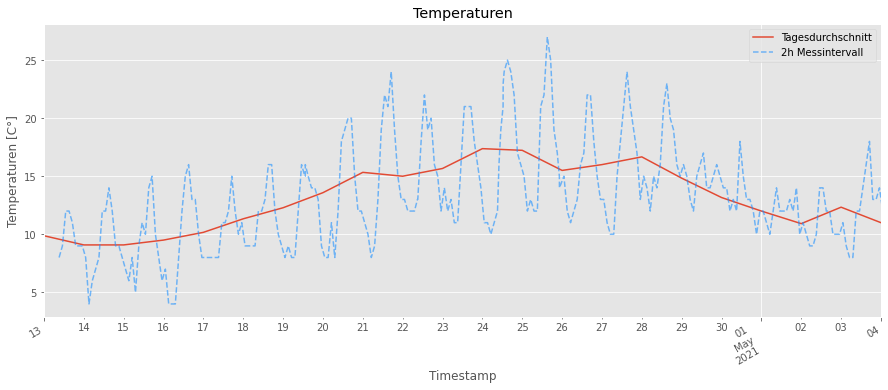

In [14]:
# Temperaturen
df_sensoneo['Temperatur'].resample('D').mean().plot(figsize=(15,6), label='Tagesdurchschnitt')
df_sensoneo['Temperatur'].plot(figsize=(15,6), color='dodgerblue', alpha=0.6, linestyle='--', label='2h Messintervall')
plt.title('Temperaturen')
plt.ylabel('Temperaturen [C°]')
plt.legend()
plt.show()

Nach prüfen Wetterdaten für den Raum Zürich besteht ein Offset der Temperatur, der Verlauf stimmt aber überrein (max zwischen 24.04 und 28.04) [link](https://www.accuweather.com/de/ch/zurich/316622/april-weather/316622)

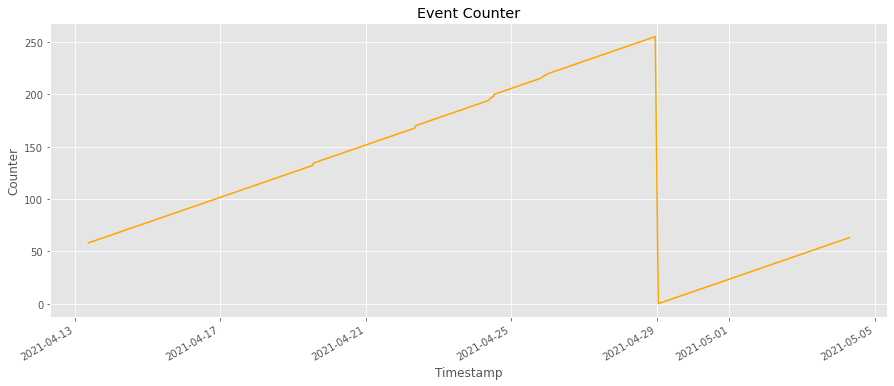

In [22]:
# Event Counter
df_sensoneo['Event Count'].plot(color='orange', figsize=(15,6))
plt.title('Event Counter')
plt.ylabel('Counter')
plt.show()

Event Counter von 255 zurück auf 0 -> Falls Messwerte vermisst werden auf diff() prüfen.

#### Interpretationen
Die Distanz von 120cm wird gemessen wenn der WC Deckel offen bleibt (für jeweils Türe offen/geschlossen). Die min. Distanz bei leerem Behälter war vor Ort ~41cm. Sensor Installation am 26. März, Messdaten aber erst seit Callbacks auf Sigfox Plattform vorhanden !?  
Messwerte grösse 100cm können entfernt werden. -> WC Deckel nicht zu  
Messwerte kleiner 5 können entfernt werden. -> Personen sitzt auf dem WC

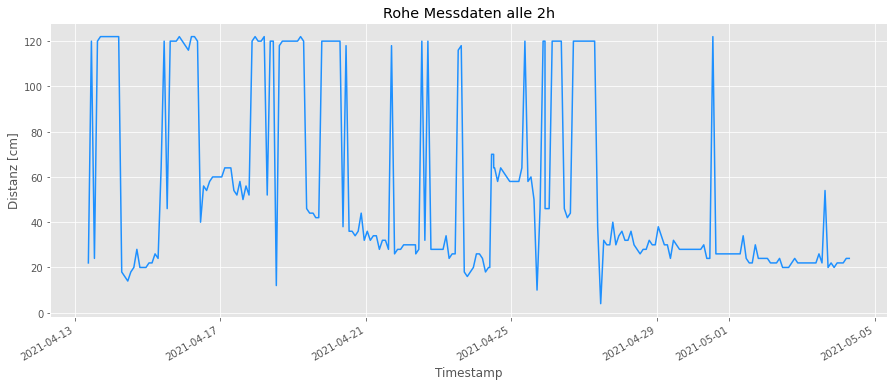

In [16]:
df_sensoneo['Distance'].plot(color='dodgerblue', figsize=(15,6))
plt.title('Rohe Messdaten alle 2h')
plt.ylabel('Distanz [cm]')
plt.show()

In [17]:
# Daten filtern und entfernen
df_sensoneo = df_sensoneo[df_sensoneo['Distance'] < 100]
df_sensoneo = df_sensoneo[df_sensoneo['Distance'] > 5]

In [18]:
# pandas slicing mit sollte direkt möglich sein ..?
#df_sensoneo['2021-04-28':'2021-04-29']
df_sensoneo.loc['2021-4-23']

,Data,Device ID,Distance,Temperatur,Spannung mV,Event Count
Timestamp,,,,,,
2021-04-23 23:06:25,b92a0070010a0a0a0a6f0ebd,0034EF62,20,14,3610,189
2021-04-23 21:06:23,b92a007001090909097010bc,0034EF62,18,16,3620,188
2021-04-23 19:06:21,b92a007001080808087012bb,0034EF62,16,18,3620,187
2021-04-23 17:06:20,b92a007001090909097015ba,0034EF62,18,21,3620,186
2021-04-23 11:06:16,b92a0070010d0d0d0d6f10b7,0034EF62,26,16,3610,183
2021-04-23 09:06:14,b92a0070010d0d0d0d6e0bb6,0034EF62,26,11,3600,182
2021-04-23 07:06:13,b92a0070010c0c0c0c6e0bb5,0034EF62,24,11,3600,181
2021-04-23 05:06:14,b92a007001111111116e0db4,0034EF62,34,13,3600,180
2021-04-23 03:06:32,b92a0070010e0e0e0e6e0cb3,0034EF62,28,12,3600,179


#### Distanz Messdaten prüfen

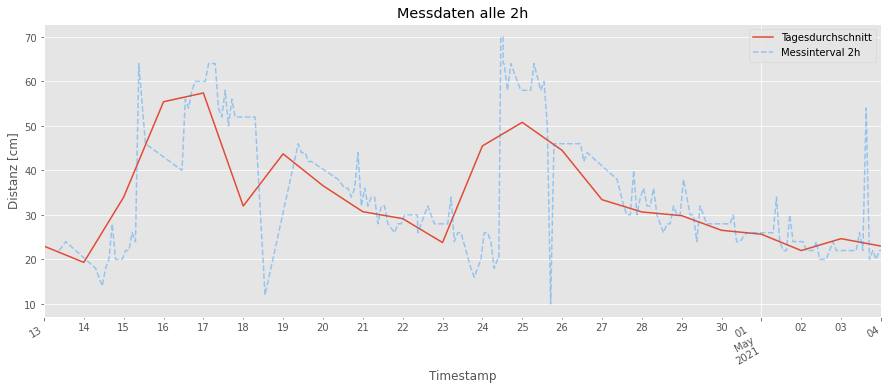

In [19]:
df_sensoneo['Distance'].resample('D').mean().plot(label='Tagesdurchschnitt')
df_sensoneo['Distance'].plot(color='dodgerblue', linestyle='--', alpha=0.4, figsize=(15,6), label='Messinterval 2h')
plt.title('Messdaten alle 2h')
plt.ylabel('Distanz [cm]')
plt.legend()
plt.show()

Text(0, 0.5, 'Distanz [cm]')

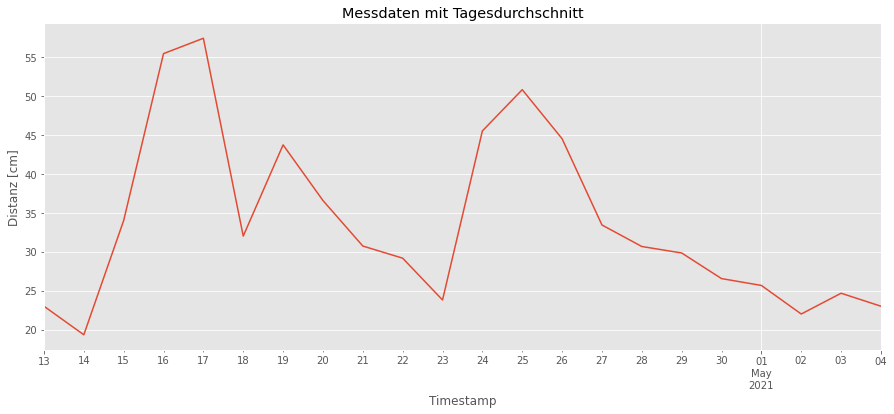

In [20]:
df_sensoneo['Distance'].resample('D').mean().plot(figsize=(15,6))
plt.title('Messdaten mit Tagesdurchschnitt')
plt.ylabel('Distanz [cm]')